# SBML example notebook

In [6]:
using SBMLImporter
using Catalyst
using ModelingToolkit
using OrdinaryDiffEq
using Sundials

# path_sbml = joinpath(@__DIR__, "dapagliflozin_intestine.xml")
path_sbml = joinpath(@__DIR__, "..", "..", "test", "models", "dapagliflozin_body_flat.xml")

"/home/mkoenig/git/sbmlsim.jl/src/examples/../../test/models/dapagliflozin_body_flat.xml"

In [7]:
prn, cb = load_SBML(path_sbml, massaction=false)


# information about system
rn = prn.rn
# species(rn)
# nonspecies(rn)

# parameters(rn)

# equations(rn)
# reactions(rn)
nonreactions(rn)
println.(nonreactions(rn))

Differential(t)(IVDOSE_dap(t)) ~ Ri_dap - Mr_dap*((IVDOSE_dap(t)*Ki_dap(t)) / Mr_dap)
Differential(t)(PODOSE_dap(t)) ~ -GU__Mr_dap*(((1//60)*GU__Ka_dis_dap*PODOSE_dap(t)) / GU__Mr_dap)
f_shunts(t) ~ f_cirrhosis
f_tissue_loss(t) ~ f_cirrhosis
Cve_daptot(t) ~ Cve_dap(t) + Cve_d3g(t)
Aurine_daptot(t) ~ Aurine_dap(t) + Aurine_d3g(t)
Afeces_daptot(t) ~ Afeces_dap(t)
FVre(t) ~ 1.0 - FVar - FVgu - FVki - FVli - FVlu - FVve
FQre(t) ~ 1.0 - FQh - FQki
BSA(t) ~ 0.024265(BW^0.5378)*(HEIGHT^0.3964)
CO(t) ~ (1//60)*COHRI*(HR - HRrest) + BW*COBW*f_cardiac_function
QC(t) ~ (3//50)*CO(t)
Vgu(t) ~ BW*FVgu
Vki(t) ~ BW*FVki
Vli(t) ~ BW*FVli
Vlu(t) ~ BW*FVlu
Vre(t) ~ BW*FVre(t)
Vve(t) ~ (-BW*(1 - FVar - FVve)*FVve*Fblood) / (FVar + FVve) + BW*FVve
Var(t) ~ (-BW*(1 - FVar - FVve)*FVar*Fblood) / (FVar + FVve) + BW*FVar
Vpo(t) ~ ((-BW*(1 - FVar - FVhv - FVpo - FVve)*FVpo*Fblood) / (FVar + FVhv + FVpo + FVve) + BW*FVpo)*(1 - HCT)
Vhv(t) ~ ((-BW*(1 - FVar - FVhv - FVpo - FVve)*FVhv*Fblood) / (FVar + FVhv + FVp

46-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 ⋮
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [11]:
tspan = (0.0, 24 * 60.0)
odesys = structural_simplify(convert(ODESystem, prn.rn))
prob = ODEProblem(odesys, prn.u0, tspan, prn.p, jac=true)
tpoints = range(tspan[1], stop=tspan[2], length=1001)
integrator = Rodas5P()


@time begin
sol = solve(
    prob, 
    integrator, # CVODE_BDF(), # Rosenbrock23(), # Tsit5()
    dense=false, saveat=tpoints)
end

# changing parameters and settings
# # updating problems using remake: https://docs.sciml.ai/Catalyst/stable/model_simulation/simulation_structure_interfacing/#simulation_structure_interfacing_problems_remake

# prob_new = remake(prob; u0 = [:PODOSE_dap => 10.0])

┌ Warning: Internal error: Variable Vli_tissue(t) was marked as being in Differential(t)(LI__dap(t)) ~ (LI__DAPIM_Vmax*(-LI__dap(t) + Cli_plasma_dap(t))) / (LI__DAPIM_Km_dap*(1 + LI__dap(t) / LI__DAPIM_Km_dap + Cli_plasma_dap(t) / LI__DAPIM_Km_dap)) + (-LI__DAP2D3G_Vmax*LI__f_ugt1a9*LI__dap(t)) / (LI__DAP2D3G_Km_dap + LI__dap(t)), but was actually zero
└ @ ModelingToolkit.StructuralTransformations /home/mkoenig/.julia/packages/ModelingToolkit/NQQXr/src/structural_transformation/utils.jl:262
┌ Warning: Internal error: Variable Vli_tissue(t) was marked as being in Differential(t)(LI__d3g(t)) ~ (LI__DAP2D3G_Vmax*LI__f_ugt1a9*LI__dap(t)) / (LI__DAP2D3G_Km_dap + LI__dap(t)) + (-LI__D3GEX_Vmax*(-Cli_plasma_d3g(t) + LI__d3g(t))) / (LI__D3GEX_Km_d3g*(1 + Cli_plasma_d3g(t) / LI__D3GEX_Km_d3g + LI__d3g(t) / LI__D3GEX_Km_d3g)), but was actually zero
└ @ ModelingToolkit.StructuralTransformations /home/mkoenig/.julia/packages/ModelingToolkit/NQQXr/src/structural_transformation/utils.jl:262


  0.000427 seconds (2.36 k allocations: 441.453 KiB)


retcode: Success
Interpolation: 1st order linear
t: 1001-element Vector{Float64}:
    0.0
    1.44
    2.88
    4.32
    5.76
    7.2
    8.64
   10.08
   11.52
   12.96
    ⋮
 1428.48
 1429.92
 1431.36
 1432.8
 1434.24
 1435.68
 1437.12
 1438.56
 1440.0
u: 1001-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 5.000000000000001, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 

  0.000980 seconds (2.50 k allocations: 464.422 KiB)


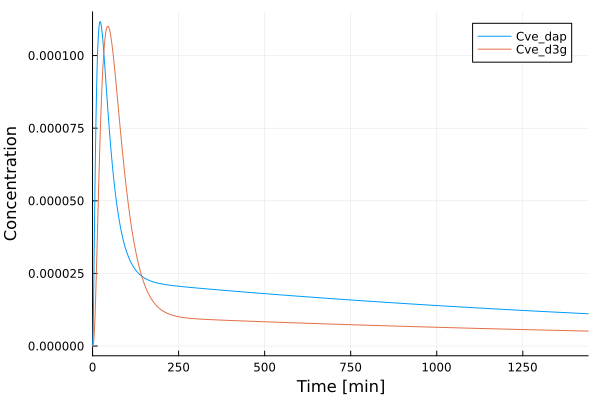

In [34]:
prob_new = prob
prob[:PODOSE_dap] = 10.0   # [mg]

@time begin
    sol = solve(prob_new, Rodas5P(), dense=false, saveat=tpoints)
end

using Plots
plot(
    sol, 
    idxs = [:Cve_dap, :Cve_d3g],
    # idxs = (:Cve_dap, :Cve_d3g),
    # idxs = (rn.Cve_dap + rn.Cve_d3g)* 1E6,
    xguide ="Time [min]", yguide="Concentration"
)


# Benchmark simulation

In [23]:
using BenchmarkTools
@benchmark solve(prob_new, Rodas5P(), dense=false)

BenchmarkTools.Trial: 7194 samples with 1 evaluation.
 Range (min … max):  616.499 μs …  17.307 ms  ┊ GC (min … max): 0.00% … 95.62%
 Time  (median):     659.644 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   691.619 μs ± 393.377 μs  ┊ GC (mean ± σ):  3.56% ±  6.19%

   ▂█▆▂     ▄▄▁                                                  
  ▂████▆▄▄▄▆███▅▃▃▂▂▂▂▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  616 μs           Histogram: frequency by time          952 μs <

 Memory estimate: 134.33 KiB, allocs estimate: 558.

# Plotting of results